In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
pd_init()

In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [3]:
t = Template(texp, '255-05_pdmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.827
...proportion of parent: 0.827
New population: debris
...proportion of total events: 0.173
...proportion of parent: 0.173
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.041
...proportion of parent: 0.050
New population: CD3-
...proportion of total events: 0.786
...proportion of parent: 0.950
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.011
...proportion of parent: 0.262
New population: live
...proportion of total events: 0.030
...proportion of parent: 0.738
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.030
...proportion of parent: 0.998
New population: doublets1
...proportion of total events: 0.000
...proportion of parent: 0.002
-------------

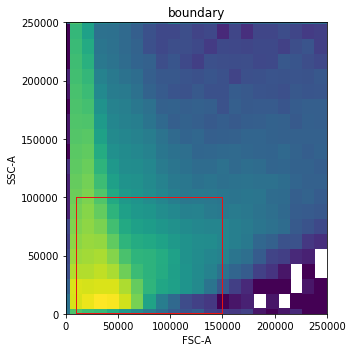

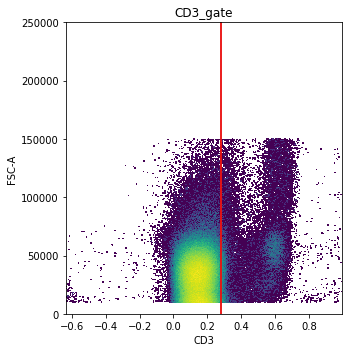

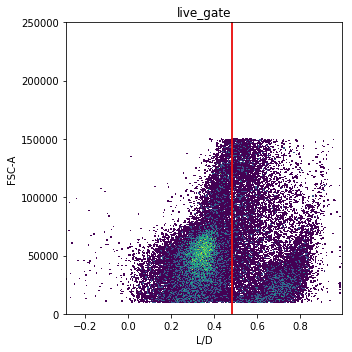

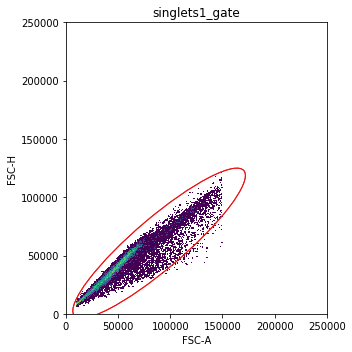

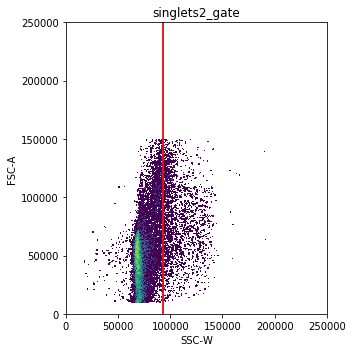

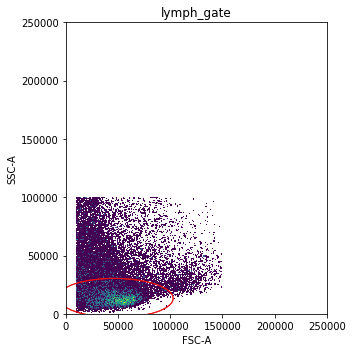

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [6]:
p, n = t.fetch_geom('CD3+'), t.fetch_geom('CD3-')
p['threshold'], n['threshold'] = 0.4, 0.4
ng = {'CD3+': p, 'CD3-': n}
t.edit_gate('CD3_gate', updated_geom=ng)

Editing gate: CD3_gate
Updating CD3+
Updating CD3-
The following gates are downstream of CD3_gate and will need to be applied again: ['live_gate', 'singlets1_gate', 'singlets2_gate', 'lymph_gate']
Edit complete!


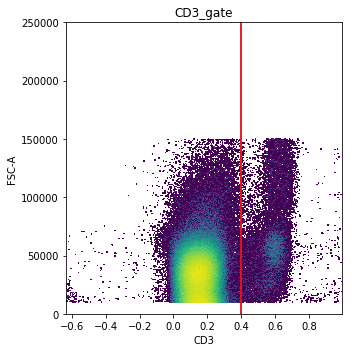

In [7]:
t.plotting.plot_gate('CD3_gate')

------ live_gate ------
New population: dead
...proportion of total events: 0.004
...proportion of parent: 0.201
New population: live
...proportion of total events: 0.017
...proportion of parent: 0.799
-----------------------


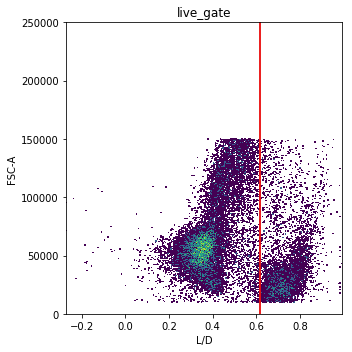

In [8]:
t.apply('live_gate')

In [9]:
p, n = t.fetch_geom('live'), t.fetch_geom('dead')
p['threshold'], n['threshold'] = 0.45, 0.45
ng = {'live': p, 'dead': n}
t.edit_gate('live_gate', updated_geom=ng)

Editing gate: live_gate
Updating dead
Updating live
The following gates are downstream of live_gate and will need to be applied again: ['singlets1_gate']
Edit complete!


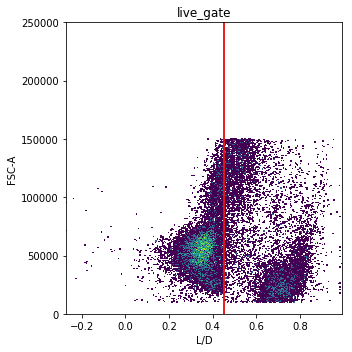

In [10]:
t.plotting.plot_gate('live_gate')

------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.011
...proportion of parent: 0.740
New population: doublets1
...proportion of total events: 0.004
...proportion of parent: 0.260
-----------------------


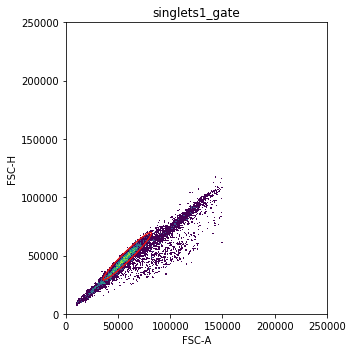

In [11]:
t.apply('singlets1_gate')

------ singlets2_gate ------
New population: doublets2
...proportion of total events: 0.001
...proportion of parent: 0.050
New population: single_Live_CD3+
...proportion of total events: 0.010
...proportion of parent: 0.950
-----------------------


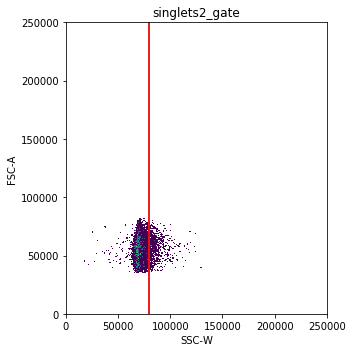

In [12]:
t.apply('singlets2_gate')

------ lymph_gate ------
New population: Lymphocytes
...proportion of total events: 0.010
...proportion of parent: 0.942
New population: other cells
...proportion of total events: 0.001
...proportion of parent: 0.058
-----------------------


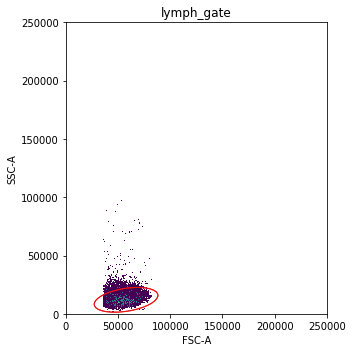

In [13]:
t.apply('lymph_gate')

In [14]:
t.save(overwrite=True)

Saved successfully!


True